In [1]:
#this file helped me to work with a dataset
import pandas as pd

dataset = pd.read_csv('Dataset.csv')
dataset

,#,Startup,Stage,Industry,Company HQ,Incorporated,Type of product,Founder name,Gender,Country based in,Age,Role in the startup
0,1,Startup 1,Development stage,Tourism,Croatia,Yes,Hardware,Founder,Male,Croatia,28.0,Designer
1,2,Startup 2,Pre-seed stage,Maritime,Croatia,Yes,Software & hardware,Founder,Male,Croatia,53.0,CEO
2,3,Startup 3,Idea stage,Education,Canada,No,Service,Founder,Male,Canada,37.0,CEO
3,4,Startup 4,Pre-seed stage,Biotech,Croatia,Yes,Service,Founder,Female,Croatia,43.0,CEO
4,5,Startup 5,Development stage,Gaming,Croatia,No,Service,Founder,Male,Croatia,23.0,Developer
...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Startup 97,Development stage,Energy,Cyprus,No,Software & hardware,Founder,Female,Cyprus,34.0,CTO
114,115,Startup 98,Seed stage,E-commerce,Germany,Yes,Hardware,Founder,Female,Cyprus,38.0,CEO
115,116,Startup 99,Idea stage,Other,Cyprus,No,Service,Founder,NaN,Cyprus,NaN,CEO
116,117,Startup 100,Small Business,Fintech,United Kingdom,Yes,Service,Founder,Male,Cyprus,46.0,Business Developer


In [26]:
rows, columns = dataset.shape

rows

118

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    118 non-null    int64  
 1   Startup              118 non-null    object 
 2   Stage                118 non-null    object 
 3   Industry             118 non-null    object 
 4   Company HQ           118 non-null    object 
 5   Incorporated         118 non-null    object 
 6   Type of product      118 non-null    object 
 7   Founder name         118 non-null    object 
 8   Gender               112 non-null    object 
 9   Country based in     116 non-null    object 
 10  Age                  113 non-null    float64
 11  Role in the startup  118 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.2+ KB


In [28]:
startup_info_dataset = dataset.filter(['Startup', 'Stage', 'Industry', 'Company HQ', 'Incorporated', 'Type of product'], axis=1)
startup_info_dataset = startup_info_dataset.drop_duplicates()
startup_info_dataset

,Startup,Stage,Industry,Company HQ,Incorporated,Type of product
0,Startup 1,Development stage,Tourism,Croatia,Yes,Hardware
1,Startup 2,Pre-seed stage,Maritime,Croatia,Yes,Software & hardware
2,Startup 3,Idea stage,Education,Canada,No,Service
3,Startup 4,Pre-seed stage,Biotech,Croatia,Yes,Service
4,Startup 5,Development stage,Gaming,Croatia,No,Service
...,...,...,...,...,...,...
113,Startup 97,Development stage,Energy,Cyprus,No,Software & hardware
114,Startup 98,Seed stage,E-commerce,Germany,Yes,Hardware
115,Startup 99,Idea stage,Other,Cyprus,No,Service
116,Startup 100,Small Business,Fintech,United Kingdom,Yes,Service


In [33]:
count_stages = startup_info_dataset['Stage'].unique()
count_stages

array(['Development stage', 'Pre-seed stage', 'Idea stage',
       'Series A stage', 'Small Business', 'Seed stage'], dtype=object)

In [29]:
#count how many industries are there
count = startup_info_dataset['Industry'].unique()
#count = dataset['Industry'].value_counts()
count

array(['Tourism', 'Maritime', 'Education', 'Biotech', 'Gaming', 'Other',
       'E-commerce', 'Social network', 'Cybersecurity', 'Health',
       'Fintech', 'Smart cities', 'Retail', 'Mobile', 'Big Data', 'Space',
       'E-sports', 'Food & beverages', 'Digital media', 'IOT',
       'Advertising', 'ICT/Telecommunications', 'Agriculture', 'Energy',
       'Transportation', 'Defence & security', 'Entertainment',
       'Social enterpise'], dtype=object)

In [44]:
len(count)

28

In [36]:
count_t = startup_info_dataset['Type of product'].unique()
count_t

array(['Hardware', 'Software & hardware', 'Service', 'Software'],
      dtype=object)

In [45]:
print(len(startup_info_dataset['Company HQ'].unique()))

17


In [2]:
count_r = dataset['Role in the startup'].unique()
count_r

array(['Designer', 'CEO', 'Developer', 'CTO', 'Business Developer', 'CMO',
       'COO', '1', 'HR', 'CFO'], dtype=object)

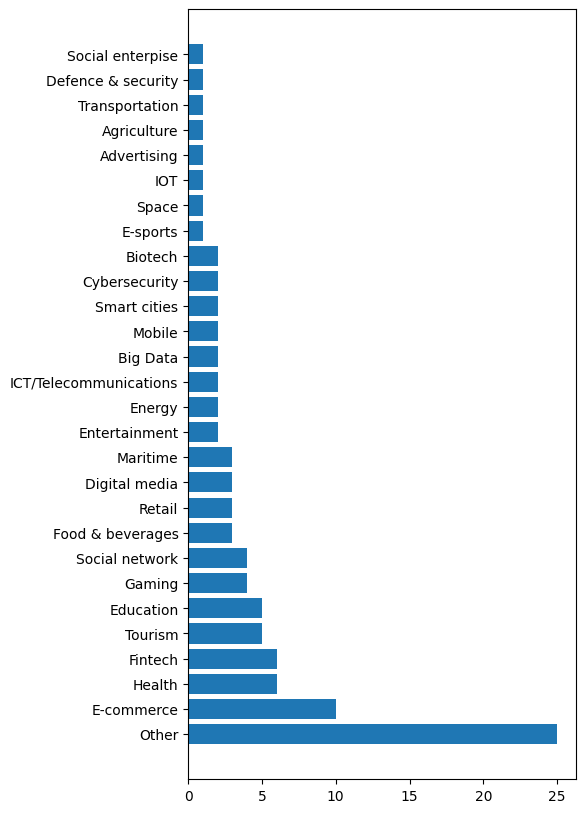

In [30]:
#visualize the amount of startups in each industry
import seaborn as sns
import matplotlib.pyplot as plt

types_count = startup_info_dataset['Industry'].value_counts()
plt.figure(figsize=(5,10))
plt.barh(width=types_count.values, y=types_count.index)
plt.show()

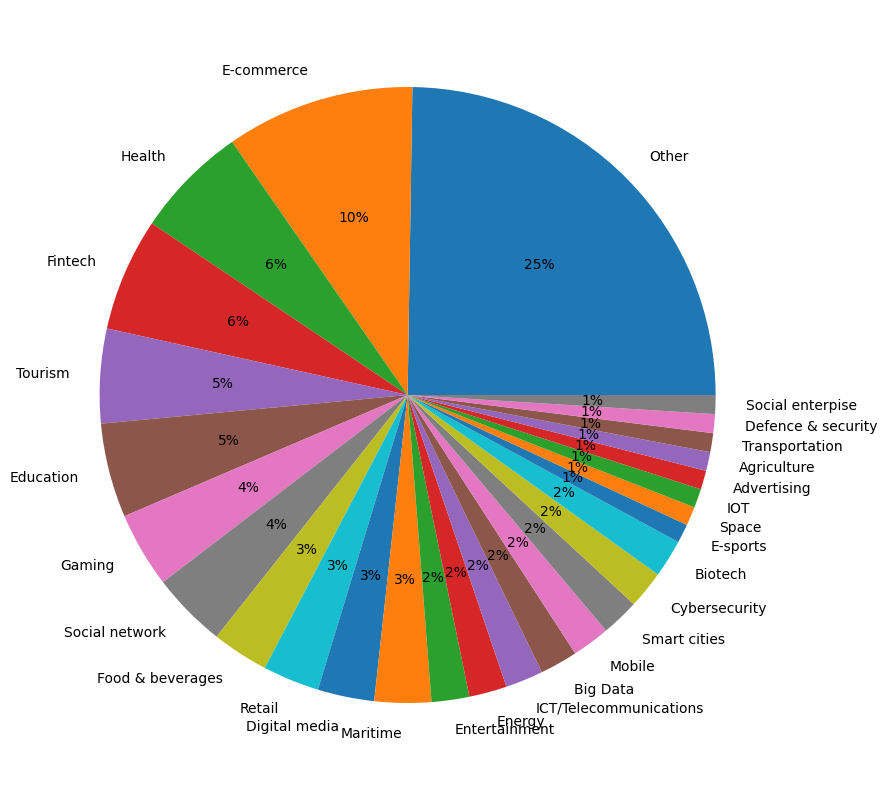

In [43]:
#visualize the amount of startups in each industry
plt.figure(figsize=(10,10))
plt.pie(types_count, labels=types_count.index, autopct='%.0f%%')
#plt.gcf().set_dpi(120)
plt.show()

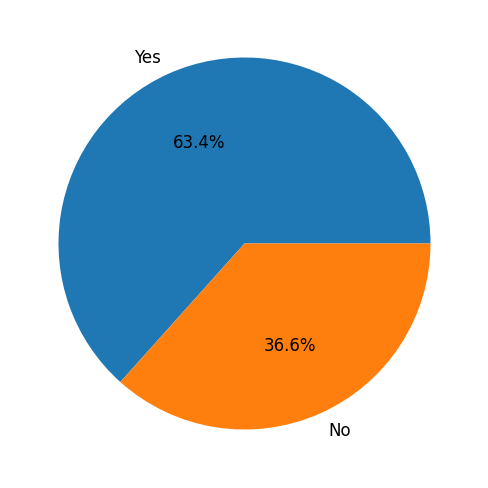

In [35]:
#visualize the "incorporated" column
plt.figure(figsize=(5,10))
plt.pie(startup_info_dataset['Incorporated'].value_counts(), labels=startup_info_dataset['Incorporated'].value_counts().index, autopct='%1.1f%%')
plt.gcf().set_dpi(120)
plt.show()

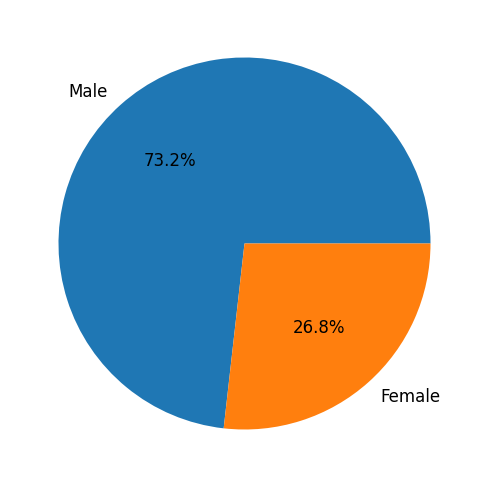

In [37]:
#visualize the gender
plt.figure(figsize=(5,10))
plt.pie(dataset['Gender'].value_counts(), labels=dataset['Gender'].value_counts().index, autopct='%1.1f%%')
plt.gcf().set_dpi(120)
plt.show()

In [7]:
#FIND THE PEOPLE WHOSE "COUNTRY BASED IN" IS DIFFERENT FROM "COMPANY HQ" OF THEIR STARTUPS
filtered_df = dataset[(dataset['Company HQ'] != dataset['Country based in'])].dropna()
filtered_df = filtered_df.filter(['#', 'Startup', 'Company HQ', 'Gender', 'Country based in', 'Age', 'Role in the startup'])
filtered_df

,#,Startup,Company HQ,Gender,Country based in,Age,Role in the startup
32,33,Startup 21,United States,Male,Spain,26.0,Business Developer
44,45,Startup 32,Switzerland,Female,Russian Federation,29.0,CEO
45,46,Startup 33,Italy,Female,Ireland,22.0,COO
69,70,Startup 55,Luxembourg,Male,India,33.0,CEO
80,81,Startup 65,Mexico,Female,United Kingdom,26.0,CEO
83,84,Startup 68,Germany,Male,Cyprus,30.0,CTO
103,104,Startup 87,Cyprus,Male,Greece,39.0,CTO
114,115,Startup 98,Germany,Female,Cyprus,38.0,CEO
116,117,Startup 100,United Kingdom,Male,Cyprus,46.0,Business Developer


In [9]:
filtered_df.shape

(9, 7)